In [104]:
import os
import sys
import shutil

from skimage.io import imread, imshow, show, imsave
from skimage.transform import rotate
from skimage import img_as_ubyte

In [105]:
os.listdir()

['rot_tenprint',
 'fgnet_latente',
 'mnt_latente',
 'mnt_tenprint',
 'tenprint',
 'rotMnt.py',
 'fgnet_tenprint',
 'teste.ipynb',
 'latente',
 'rotation.py',
 'rot_latente']

(768, 800)

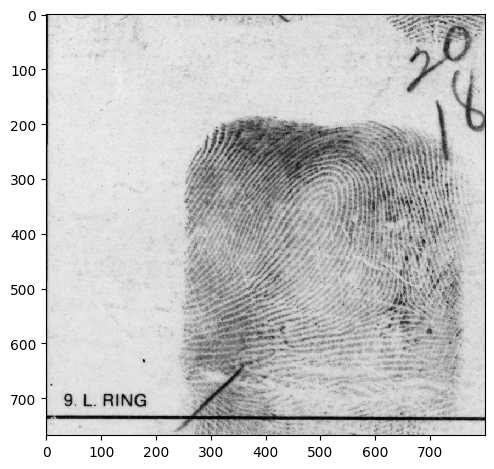

In [106]:
img = imread('tenprint/b101_9_t.png')
imshow(img);
img.shape

(768, 800)

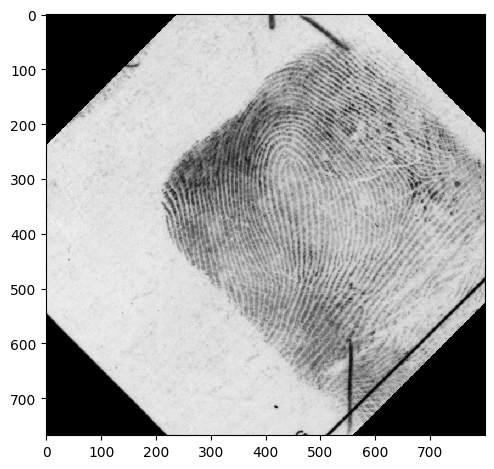

In [107]:
imgRot = rotate(img, 45)
imshow(imgRot);
imgRot.shape

# Rotar minucias

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('mnt_tenprint/b101_9_t.txt', delim_whitespace=True, header=None, skiprows=1)
df.head()

,0,1,2,3
0,606,329,92,1
1,639,447,90,1
2,653,461,96,1
3,629,337,98,1
4,643,314,102,1


In [110]:
mnt = np.zeros_like(img)
mnt.shape

(768, 800)

In [111]:
for index, row in df.iterrows():
    mnt[row[1]][row[0]] = 1

In [112]:
np.unique(mnt, return_counts=True)

(array([0, 1], dtype=uint8), array([614294,    106]))

/data_lids/home/walter/.local/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


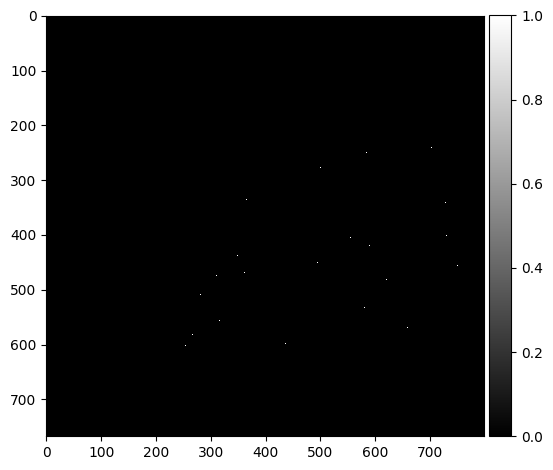

In [113]:
imshow(mnt, cmap='gray');

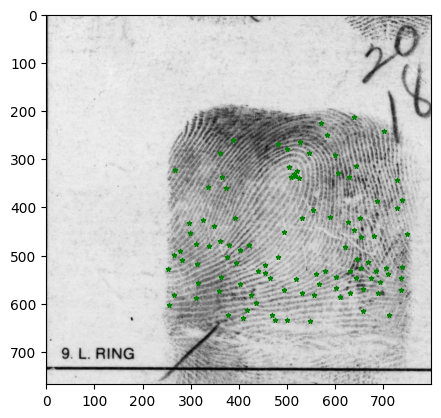

In [114]:
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.scatter(df[0], df[1], s=10, c='green', marker='*')
plt.show()

(768, 800)

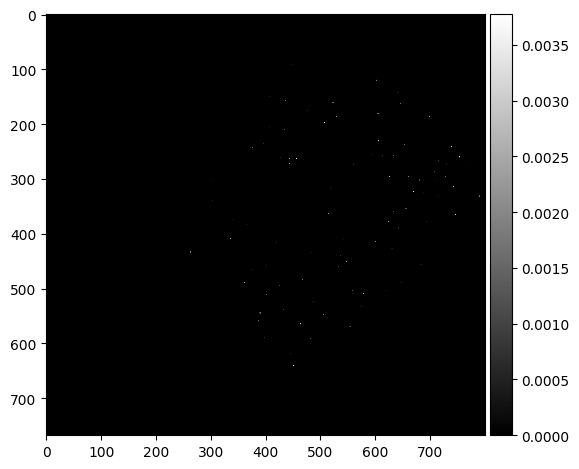

In [115]:
mntRot = rotate(mnt, 45)
imshow(mntRot, cmap='gray');
mntRot.shape

In [116]:
mask = mntRot > 0
points = np.column_stack(np.where(mask))

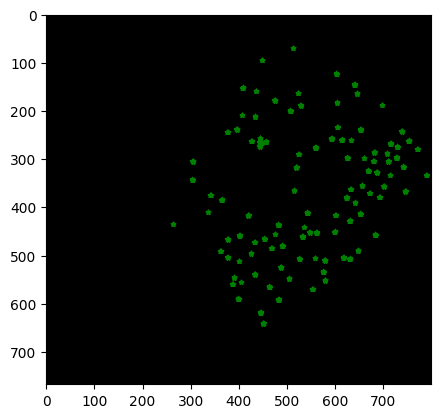

In [117]:
fig, ax = plt.subplots()
ax.imshow(mntRot, cmap='gray')
ax.scatter(points[:,1], points[:,0], s=10, c='green', marker='*')
plt.show()

In [118]:
mask = mntRot > 0
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [119]:
mask = mntRot > 0
points = np.column_stack(np.where(mask))

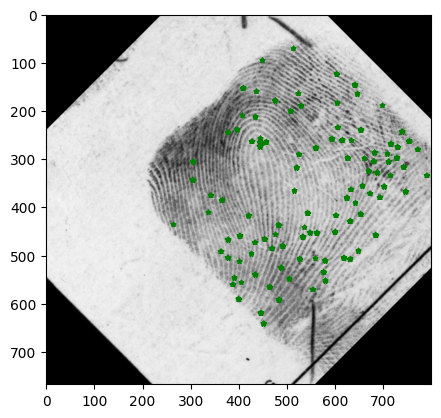

In [125]:
fig, ax = plt.subplots()
ax.imshow(imgRot, cmap='gray')
ax.scatter(points[:,1], points[:,0], s=10, c='green', marker='*')
#ax.axis('off')
plt.show()